**AIM:** To implement K-means clustering using scikit-learn library for unlabeled and labeled data

In [27]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [28]:
kmeans=KMeans(n_clusters=2, random_state=142)
prediction=kmeans.fit_predict(cancer.data)
prediction

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [29]:
kmeans.cluster_centers_.shape

(2, 30)

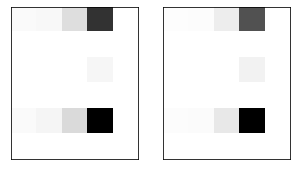

In [30]:
# Scatter plot of the data pointsimport matplotlib.pyplot as plt
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(5,5))
centers = kmeans.cluster_centers_.reshape(2,6,5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [31]:
import numpy as np
from scipy.stats import mode

labels=np.zeros_like(prediction)
for i in range(2):
  mask=(prediction==i)
  labels[mask]=mode(cancer.target[mask])[0]

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(cancer.target,labels)

0.8541300527240774

Text(91.68, 0.5, 'predicted label')

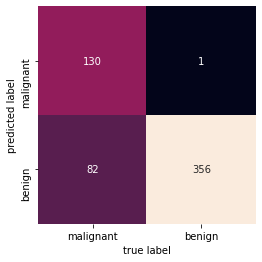

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat=confusion_matrix(cancer.target,labels)
ax=sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=cancer.target_names,yticklabels=cancer.target_names)
ax.set_ylim(2.0,0)
plt.xlabel('true label')
plt.ylabel('predicted label')